In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as Axes3D

In [2]:
N = 1000
x = np.random.random((N, 2)) * 6 - 3 #uniform dsitribution from 3 , -3
y = np.cos(2*x[:, 0]) + np.cos(x[:, 1]) # non linear function needed

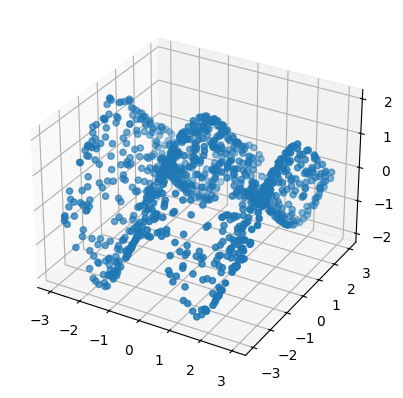

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], y)
plt.show()

In [4]:
model = nn.Sequential(
    nn.Linear(2, 128),
    nn.ReLU(),
    nn.Linear(128, 1)
)

In [5]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [6]:
def full_gd(model, criterion, optimizer, x_train, y_train, epochs=1000):
    train_losses = np.zeros(epochs)
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(x_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        train_losses[epoch] = loss.item()
        if (epoch+1) % 100 == 0:
            print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')
    return train_losses

x_train = torch.from_numpy(x.astype(np.float32))
y_train = torch.from_numpy(y.astype(np.float32).reshape(-1, 1))
train_losses = full_gd(model, criterion, optimizer, x_train, y_train)


Epoch 100/1000, Loss: 0.0206
Epoch 200/1000, Loss: 0.0038
Epoch 300/1000, Loss: 0.0022
Epoch 400/1000, Loss: 0.0022
Epoch 500/1000, Loss: 0.0012
Epoch 600/1000, Loss: 0.0010
Epoch 700/1000, Loss: 0.0009
Epoch 800/1000, Loss: 0.0008
Epoch 900/1000, Loss: 0.0008
Epoch 1000/1000, Loss: 0.0008


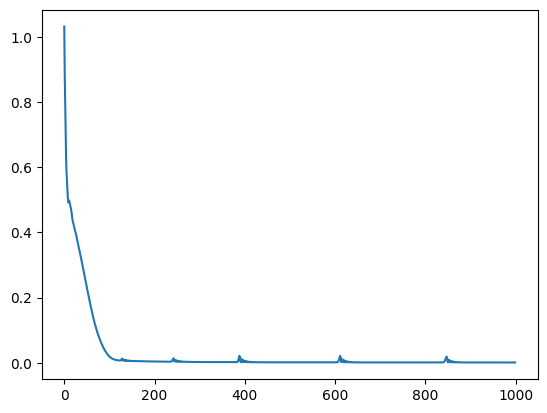

In [8]:
plt.plot(train_losses)

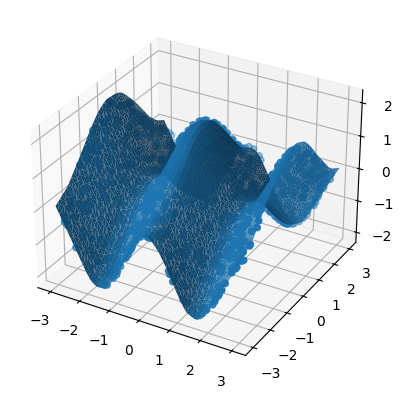

In [9]:
# tesing the nn

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], y)

with torch.no_grad():
  line = np.linspace(-3, 3, 50)
  xx, yy = np.meshgrid(line, line)
  xgrid = np.vstack((xx.flatten(), yy.flatten())).T
  xgrid_torch = torch.from_numpy(xgrid.astype(np.float32))
  y_hat = model(xgrid_torch).numpy().flatten()
  ax.plot_trisurf(xgrid[:,0],xgrid[:,1],y_hat,linewidth = 0.2, antialiased = True)
  plt.show()

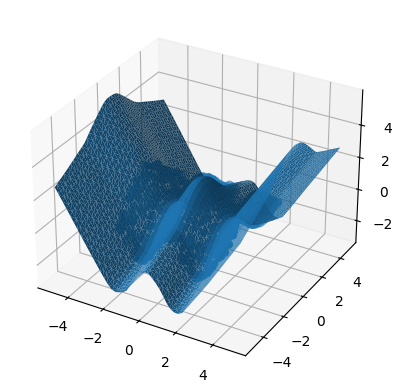

In [11]:
# can it extrapolate?

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[:, 0], x[:, 1], y)

with torch.no_grad():
  line = np.linspace(-5, 5, 50)
  xx, yy = np.meshgrid(line, line)
  xgrid = np.vstack((xx.flatten(), yy.flatten())).T
  xgrid_torch = torch.from_numpy(xgrid.astype(np.float32))
  y_hat = model(xgrid_torch).numpy().flatten()
  ax.plot_trisurf(xgrid[:,0],xgrid[:,1],y_hat,linewidth = 0.2, antialiased = True)
  plt.show()

#no